In [1]:
import pandas as pd

# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('pickle/data_clean_r4.pkl')
data_clean

,content
0,so sorry to tell you that you have stage ovari...
1,if you buy something through link on this page...
2,cluster of more than pneumonia in the central ...
3,at hong international airport are being for my...
4,the finding that the outbreak of viral pneumon...
...,...
55532,good morning said the government had only ever...
55533,forward his future at despite talk that is con...
55534,the deal agreed by new jersey new york and isl...
55535,around the world have seen major and amid the ...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   norm='l1', # ELL - ONE
                                   use_idf=False)
tfidf = tfidf_vectorizer.fit_transform(data_clean.content)

In [21]:
import pickle

kmeans = KMeans(n_clusters=2).fit(tfidf)
pickle.dump(kmeans, open("pickle/kmeans.pkl", "wb"))

In [10]:
lines_for_predicting = ["tf and idf is awesome!", "so sorry to tell you that you have stage two cancer"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

array([0, 0], dtype=int32)

In [16]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
my,0.574563
cancer,0.311175
and,0.246626
me,0.211389
the,0.197347
...,...
foil,0.000000
fogle,0.000000
foghorn,0.000000
foggy,0.000000


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
data = pd.read_pickle('pickle/data_clean_r4.pkl')
data.head()

,content
0,so sorry to tell you that you have stage ovari...
1,if you buy something through link on this page...
2,cluster of more than pneumonia in the central ...
3,at hong international airport are being for my...
4,the finding that the outbreak of viral pneumon...


In [5]:
# Apply the nouns function to the transcripts to filter only on nouns
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
data_nouns = pd.DataFrame(data.content.apply(nouns))
data_nouns.head()
data_nouns.to_pickle('pickle/data_nouns.pkl')

In [45]:
data = pd.read_pickle('pickle/data_nouns.pkl')

tfidf = TfidfVectorizer(
    min_df = .3,
    max_df = 0.95,
    #max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data.content)
text = tfidf.transform(data.content)

In [46]:
df = pd.DataFrame(text[0].T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
time,0.734027
day,0.585612
year,0.270042
number,0.143496
health,0.119560
people,0.102247
government,0.000000
home,0.000000
march,0.000000
newspaper,0.000000


Fit 5 clusters
Fit 10 clusters
Fit 15 clusters
Fit 20 clusters
Fit 25 clusters
Fit 30 clusters
Fit 35 clusters
Fit 40 clusters
Fit 45 clusters
Fit 50 clusters
Fit 55 clusters
Fit 60 clusters
Fit 65 clusters
Fit 70 clusters
Fit 75 clusters
Fit 80 clusters
Fit 85 clusters
Fit 90 clusters
Fit 95 clusters
Fit 100 clusters


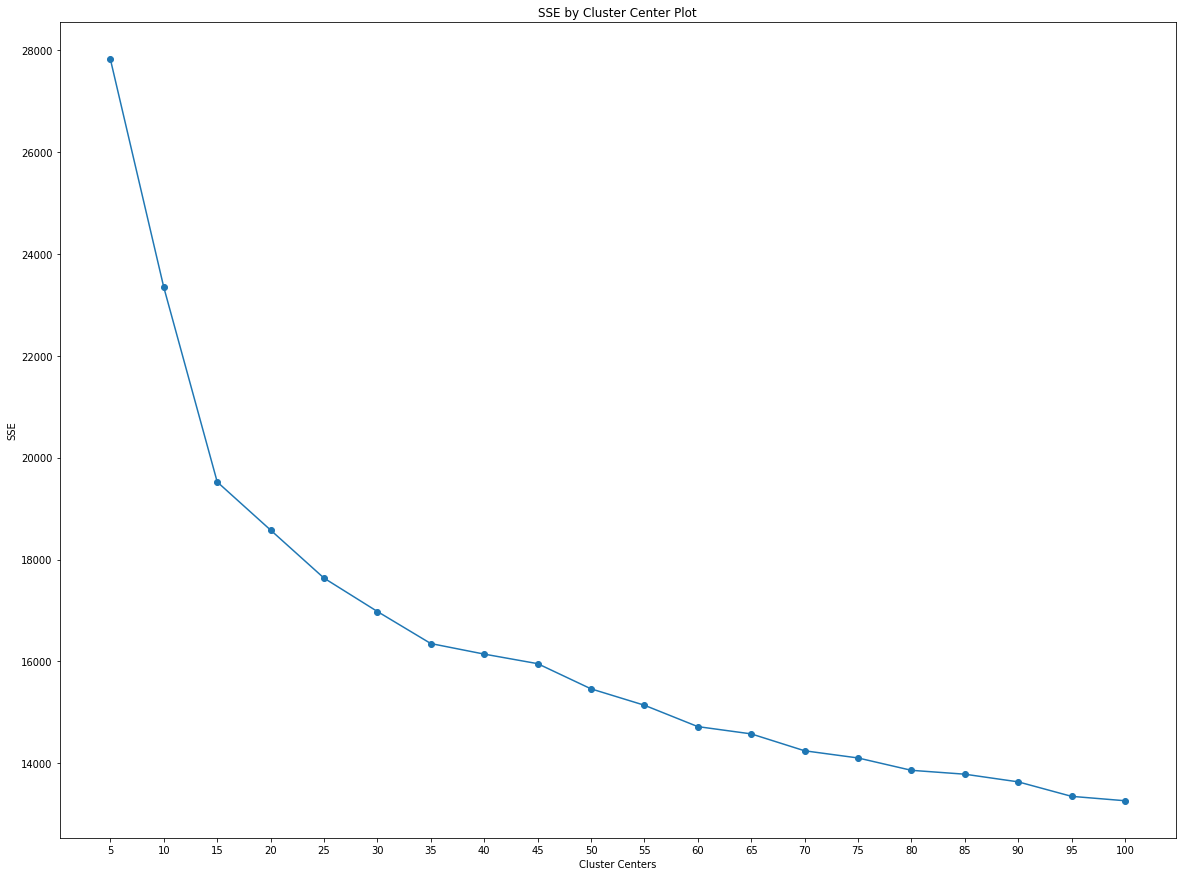

In [47]:
def find_optimal_clusters(data, max_k, start_k=2, k_step=2):
    iters = range(start_k, max_k+1, k_step)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k,
                                   init_size=1024,
                                   batch_size=2048,
                                   random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1, figsize=(20,15))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 100, 5, 5)

In [53]:
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20, verbose=True).fit_predict(text)

Init 1/3 with method: k-means++
Inertia for init 1/3: 453.546158
Init 2/3 with method: k-means++
Inertia for init 2/3: 460.508217
Init 3/3 with method: k-means++
Inertia for init 3/3: 460.056582
Minibatch iteration 1/2800: mean batch inertia: 0.454267, ewa inertia: 0.454267 
Minibatch iteration 2/2800: mean batch inertia: 0.433072, ewa inertia: 0.452704 
Minibatch iteration 3/2800: mean batch inertia: 0.435603, ewa inertia: 0.451442 
Minibatch iteration 4/2800: mean batch inertia: 0.427795, ewa inertia: 0.449698 
Minibatch iteration 5/2800: mean batch inertia: 0.431132, ewa inertia: 0.448329 
Minibatch iteration 6/2800: mean batch inertia: 0.427174, ewa inertia: 0.446769 
Minibatch iteration 7/2800: mean batch inertia: 0.424104, ewa inertia: 0.445097 
Minibatch iteration 8/2800: mean batch inertia: 0.424196, ewa inertia: 0.443556 
Minibatch iteration 9/2800: mean batch inertia: 0.422352, ewa inertia: 0.441992 
Minibatch iteration 10/2800: mean batch inertia: 0.423736, ewa inertia: 0.44

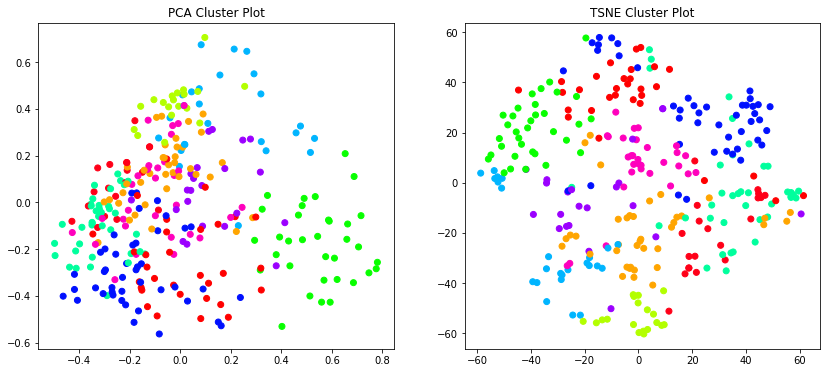

In [54]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=10).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [56]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
government,day,number,express,order,virus,people,health,coronavirus,newspaper

Cluster 1
number,year,people,time,health,world,day,coronavirus,crisis,week

Cluster 2
crisis,number,outbreak,week,health,time,year,day,coronavirus,march

Cluster 3
people,home,year,world,day,coronavirus,time,order,express,newspaper

Cluster 4
government,time,number,day,outbreak,world,people,coronavirus,health,virus

Cluster 5
day,crisis,people,march,world,week,outbreak,time,coronavirus,year

Cluster 6
week,number,virus,government,time,health,day,coronavirus,home,people

Cluster 7
week,year,health,crisis,home,world,people,day,coronavirus,time

Cluster 8
number,virus,day,week,time,crisis,health,people,coronavirus,government

Cluster 9
year,week,world,number,day,people,virus,health,outbreak,coronavirus
